# Hello, KAN!

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where 

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

In [1]:
from kan.KAN import KAN
import torch
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons.
model = KAN(width=[2,5,1], seed=42, device=device)

cpu


Create dataset

In [2]:
from kan.utils import create_dataset
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [3]:
import numpy as np
import torch
from scipy.special import j0

# Generate training data
x = np.linspace(-1, 1, 200).reshape(-1, 1)
y = j0(20 * x)

dataset = {
    'train_input': torch.tensor(x, dtype=torch.float32),
    'train_output': torch.tensor(y, dtype=torch.float32)
}

# Create model
model = KAN(width=[1, 1], device='cpu', use_qsp=True)
model.fit(dataset, opt="LBFGS", steps=10, lamb=0.0)
model.plot(folder="./figures_bessel")


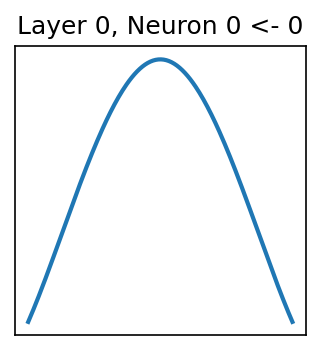

In [7]:
################################################################### FULL BESSEL FUNCTION EXAMPLE WITH QSP ###############################################
import os
import glob
import numpy as np
import torch
from scipy.special import j0
from kan.KAN import KAN  # adjust to your actual path
from IPython.display import Image, display

# Step 1: Generate training data
x = np.linspace(-1, 1, 200).reshape(-1, 1)
y = j0(20 * x)

dataset = {
    'train_input': torch.tensor(x, dtype=torch.float32),
    'train_output': torch.tensor(y, dtype=torch.float32)
}

# Step 2: Create model
model = KAN(width=[1, 1], device='cpu', use_qsp=True)

# Step 3: Fit model
model.fit(dataset, opt="LBFGS", steps=10, lamb=0.0)

# Step 4: Plot learned activation functions
plot_folder = "./figures_bessel"
model.plot(folder=plot_folder)

# Step 5: Display the saved PNG image directly in notebook
saved_plots = sorted(glob.glob(os.path.join(plot_folder, "*.png")))
if saved_plots:
    display(Image(filename=saved_plots[0]))
else:
    print("No plots found.")


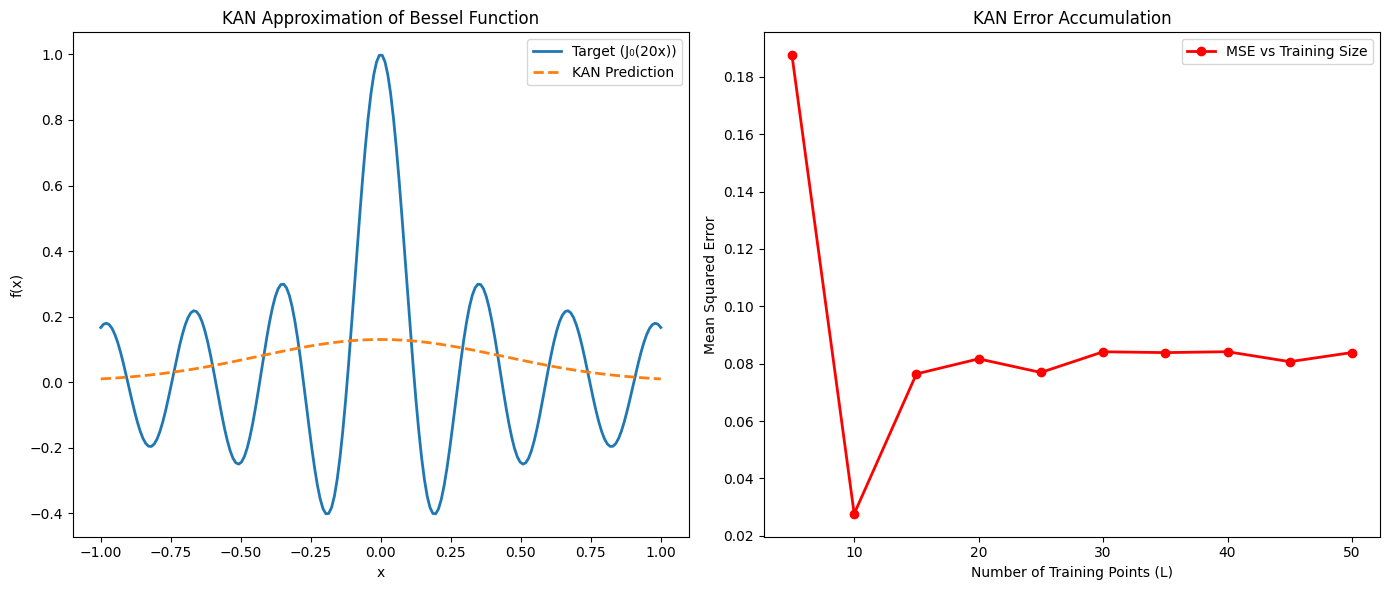

In [ ]:
################################################ERROR APPROX GRAPHS AND FULL BESSEL FUNCTION EXAMPLE WITH QSP ###############################################
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.special import j0
from kan.KAN import KAN  # Adjust to your actual import path

# --------------------------------------
# Helper: Train KAN model on dataset
# --------------------------------------
def train_kan_on_dataset(x, y, width=[1, 1], steps=10):
    dataset = {
        'train_input': torch.tensor(x, dtype=torch.float32),
        'train_output': torch.tensor(y, dtype=torch.float32)
    }
    model = KAN(width=width, device='cpu', use_qsp=True)
    model.fit(dataset, opt="LBFGS", steps=steps, lamb=0.0, verbose=False)
    with torch.no_grad():
        preds = model(torch.tensor(x, dtype=torch.float32)).numpy()
    return model, preds

# --------------------------------------
# Full input range for function plotting
# --------------------------------------
x_full = np.linspace(-1, 1, 200).reshape(-1, 1)
y_full = j0(20 * x_full)

# Train once on full data for main plot
model_full, preds_full = train_kan_on_dataset(x_full, y_full, width=[1, 1], steps=10)

# --------------------------------------
# Error curve for varying training set sizes
# --------------------------------------
errors = []
L_values = np.arange(5, 51, 5)  # from 5 to 50 points

for L in L_values:
    x_small = np.linspace(-1, 1, L).reshape(-1, 1)
    y_small = j0(20 * x_small)
    _, preds_small = train_kan_on_dataset(x_small, y_small, width=[1, 1], steps=10)
    error = np.mean((preds_small - y_small) ** 2)
    errors.append(error)

# --------------------------------------
# Plot: Function approximation + Error accumulation
# --------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: Bessel function approximation
ax1.plot(x_full, y_full, label="Target (J₀(20x))", linewidth=2)
ax1.plot(x_full, preds_full, '--', label="KAN Prediction", linewidth=2)
ax1.set_title("KAN Approximation of Bessel Function")
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.legend()

# Right: Error accumulation
ax2.plot(L_values, errors, 'o-r', linewidth=2, label="MSE vs Training Size")
ax2.set_title("KAN Error Accumulation")
ax2.set_xlabel("Number of Training Points (L)")
ax2.set_ylabel("Mean Squared Error")
ax2.legend()

plt.tight_layout()
plt.show()


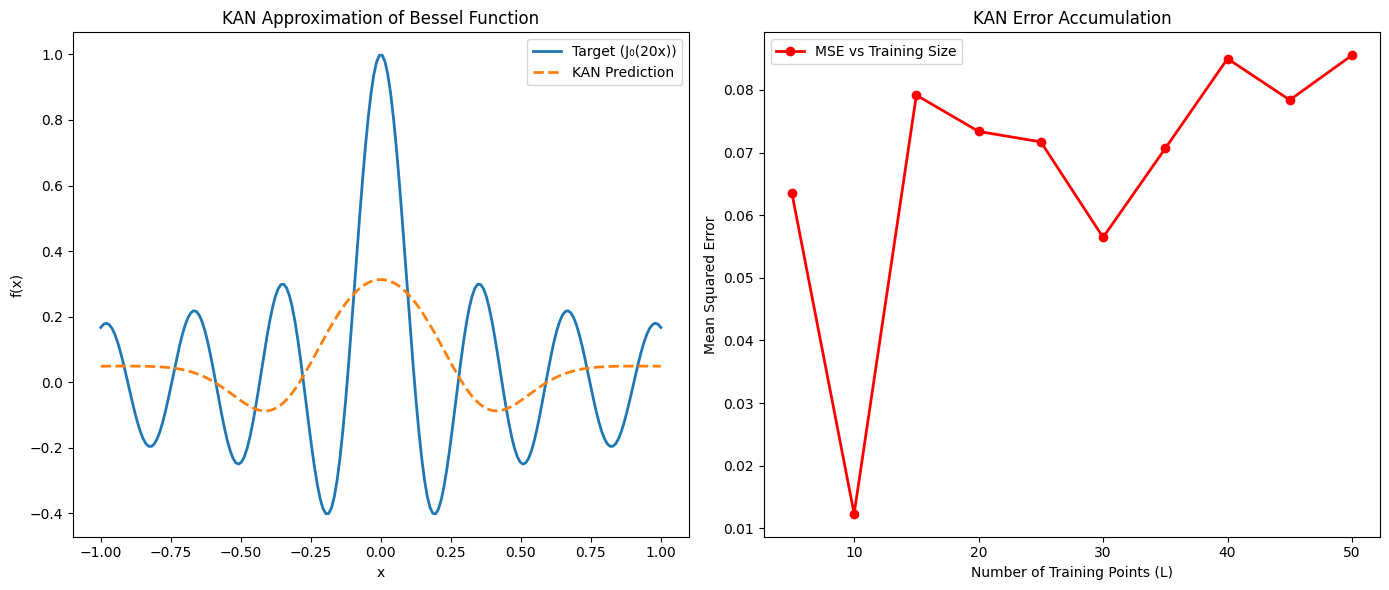

In [9]:
################################################ERROR APPROX GRAPHS AND FULL BESSEL FUNCTION EXAMPLE WITH QSP ###############################################
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.special import j0
from kan.KAN import KAN  # Adjust to your actual import path

# --------------------------------------
# Helper: Train KAN model on dataset
# --------------------------------------
def train_kan_on_dataset(x, y, width=[1, 1], steps=10):
    dataset = {
        'train_input': torch.tensor(x, dtype=torch.float32),
        'train_output': torch.tensor(y, dtype=torch.float32)
    }
    model = KAN(width=[1, 10, 10, 1], device='cpu', use_qsp=True) # 2 hidden layers each with 10 QSP neurons
    model.fit(dataset, opt="LBFGS", steps=steps, lamb=0.0, verbose=False)
    with torch.no_grad():
        preds = model(torch.tensor(x, dtype=torch.float32)).numpy()
    return model, preds

# --------------------------------------
# Full input range for function plotting
# --------------------------------------
x_full = np.linspace(-1, 1, 200).reshape(-1, 1)
y_full = j0(20 * x_full)

# Train once on full data for main plot
model_full, preds_full = train_kan_on_dataset(x_full, y_full, width=[1, 1], steps=10)

# --------------------------------------
# Error curve for varying training set sizes
# --------------------------------------
errors = []
L_values = np.arange(5, 51, 5)  # from 5 to 50 points

for L in L_values:
    x_small = np.linspace(-1, 1, L).reshape(-1, 1)
    y_small = j0(20 * x_small)
    _, preds_small = train_kan_on_dataset(x_small, y_small, width=[1, 1], steps=10)
    error = np.mean((preds_small - y_small) ** 2)
    errors.append(error)

# --------------------------------------
# Plot: Function approximation + Error accumulation
# --------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: Bessel function approximation
ax1.plot(x_full, y_full, label="Target (J₀(20x))", linewidth=2)
ax1.plot(x_full, preds_full, '--', label="KAN Prediction", linewidth=2)
ax1.set_title("KAN Approximation of Bessel Function")
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.legend()

# Right: Error accumulation
ax2.plot(L_values, errors, 'o-r', linewidth=2, label="MSE vs Training Size")
ax2.set_title("KAN Error Accumulation")
ax2.set_xlabel("Number of Training Points (L)")
ax2.set_ylabel("Mean Squared Error")
ax2.legend()

plt.tight_layout()
plt.show()


Plot KAN at initialization

In [4]:
# train the model
model = KAN(width=[2,5,1], seed=42, device=device)
model(dataset['train_input'])
model.plot()

Train KAN with sparsity regularization

In [6]:
# train the model
model.fit(dataset, opt="LBFGS", steps=5, lamb=0.001)

Plot trained KAN

In [5]:
model.plot()

Prune KAN and replot

In [8]:
model = model.prune()
model.plot()

AttributeError: 'KAN' object has no attribute 'prune'

Continue training and replot

In [7]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.79e-02 | test_loss: 1.72e-02 | reg: 7.66e+00 | : 100%|█| 50/50 [00:06<00:00,  7.21it

saving model version 0.3


In [8]:
model = model.refine(10)

saving model version 0.4


In [9]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 4.67e-04 | test_loss: 4.73e-04 | reg: 7.66e+00 | : 100%|█| 50/50 [00:06<00:00,  7.37it

saving model version 0.5


Automatically or manually set activation functions to be symbolic

In [10]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999999188529035, c=2
fixing (0,1,0) with x^2, r2=0.9999999809840728, c=2
fixing (1,0,0) with exp, r2=0.9999999904907739, c=2
saving model version 0.6


Continue training till machine precision

In [11]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 3.33e-10 | test_loss: 7.20e-11 | reg: 0.00e+00 | : 100%|█| 50/50 [00:02<00:00, 24.56it


saving model version 0.7


Obtain the symbolic formula

In [12]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(1.0*x_2**2 + 1.0*sin(3.1416*x_1))